In [26]:
# Import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


In [27]:
# Read in datafile

df = pd.read_csv("D:/Portfolio/Data Engineer Track/Power BI/Chase Spending 05-22 thru 11-16-22/CSP Spending.csv")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction Date   292 non-null    object 
 1   Post Date          292 non-null    object 
 2   P_Month            292 non-null    int64  
 3   P_Month_Name       292 non-null    object 
 4   P_Day              292 non-null    int64  
 5   P_Year             292 non-null    int64  
 6   T_Month            292 non-null    int64  
 7   T_Month_Name       292 non-null    object 
 8   T_Day              292 non-null    int64  
 9   T_Year             292 non-null    int64  
 10  Description        292 non-null    object 
 11  Category           292 non-null    object 
 12  Type               292 non-null    object 
 13  Amount             292 non-null    float64
 14  PositiveAmount     292 non-null    float64
 15  TransactionPoints  292 non-null    float64
dtypes: float64(3), int64(6), o

In [29]:
# Positive Amount is: the amount I spent on the credit card is a positive number. 
# The amount I paid on the card is a negative number. 

df["PositiveAmount"].describe()


count     292.000000
mean       85.889212
std       228.648487
min         0.680000
25%        23.040000
50%        38.785000
75%        64.100000
max      2859.880000
Name: PositiveAmount, dtype: float64

In [30]:
df.head()

,Transaction Date,Post Date,P_Month,P_Month_Name,P_Day,P_Year,T_Month,T_Month_Name,T_Day,T_Year,Description,Category,Type,Amount,PositiveAmount,TransactionPoints
0,11/14/2022,11/15/2022,11,November,15,2022,11,November,14,2022,Amazon.com*HB5VJ72B1,Shopping,Sale,-98.31,98.31,98.0
1,11/14/2022,11/15/2022,11,November,15,2022,11,November,14,2022,Prime Video *HB6W95TJ2,Shopping,Sale,-0.99,0.99,1.0
2,11/14/2022,11/15/2022,11,November,15,2022,11,November,14,2022,KROGER 542,Groceries,Sale,-77.64,77.64,78.0
3,11/14/2022,11/15/2022,11,November,15,2022,11,November,14,2022,TEMI COTRANSCRIPTION,Professional Services,Sale,-5.50,5.50,6.0
4,11/13/2022,11/14/2022,11,November,14,2022,11,November,13,2022,TEMI COTRANSCRIPTION,Professional Services,Sale,-6.00,6.00,6.0


In [31]:
df.tail()

,Transaction Date,Post Date,P_Month,P_Month_Name,P_Day,P_Year,T_Month,T_Month_Name,T_Day,T_Year,Description,Category,Type,Amount,PositiveAmount,TransactionPoints
287,5/31/2022,6/1/2022,6,June,1,2022,5,May,31,2022,KROGER 542,Groceries,Sale,-0.68,0.68,1.0
288,5/29/2022,5/30/2022,5,May,30,2022,5,May,29,2022,DREAMHOST,Bills & Utilities,Sale,-29.94,29.94,30.0
289,5/28/2022,5/29/2022,5,May,29,2022,5,May,28,2022,JERSEY MIKES 6024,Food & Drink,Sale,-42.05,42.05,42.0
290,5/28/2022,5/29/2022,5,May,29,2022,5,May,28,2022,SCORPIOSUNSCORPIOMOON,Shopping,Sale,-27.21,27.21,27.0
291,5/29/2022,5/29/2022,5,May,29,2022,5,May,29,2022,SELECT MEDIA,Shopping,Sale,-17.00,17.00,17.0


<AxesSubplot:xlabel='PositiveAmount', ylabel='P_Month_Name'>

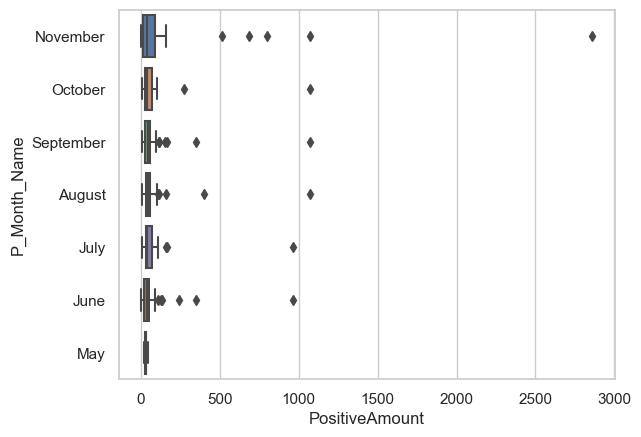

In [47]:
#  Violin plot for Transactions
sns.set_theme(style = "whitegrid")

# Draw a violin plot
sns.boxplot(data = df, x = "PositiveAmount", y = "P_Month_Name")

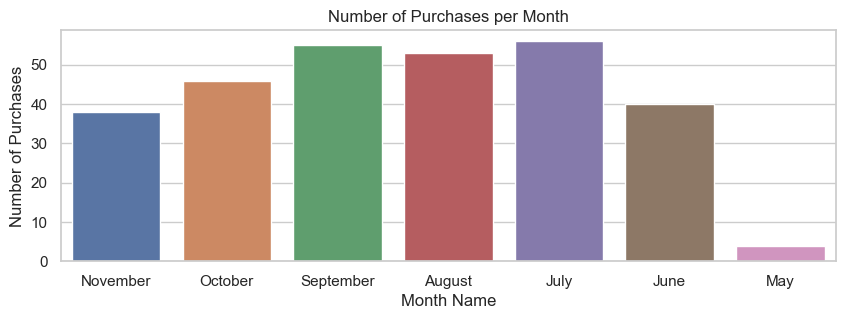

In [40]:
# Number of purchases per month


# Set figure size (width, height) in inches
fig, ax = plt.subplots(figsize = ( 10 , 3 ))

sns.countplot(ax = ax, x = "P_Month_Name", data = df) 

ax.set_xlabel("Month")
ax.set_ylabel("Number of Purchases")
ax.set_title("Number of Purchases per Month")


# Show the plot
plt.show()

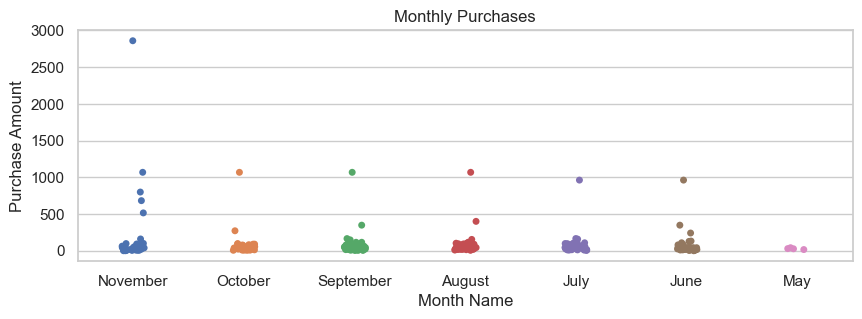

In [49]:
# Strip plot - a scatter plot for categorical variables
sns.set(style = "whitegrid")

# Set figure size (width, height) in inches
fig, ax = plt.subplots(figsize = ( 10 , 3 ))

sns.stripplot(x = "P_Month_Name", y = "PositiveAmount", data = df)

ax.set_xlabel("Month Name")
ax.set_ylabel("Purchase Amount")
ax.set_title("Monthly Purchases")

plt.show()

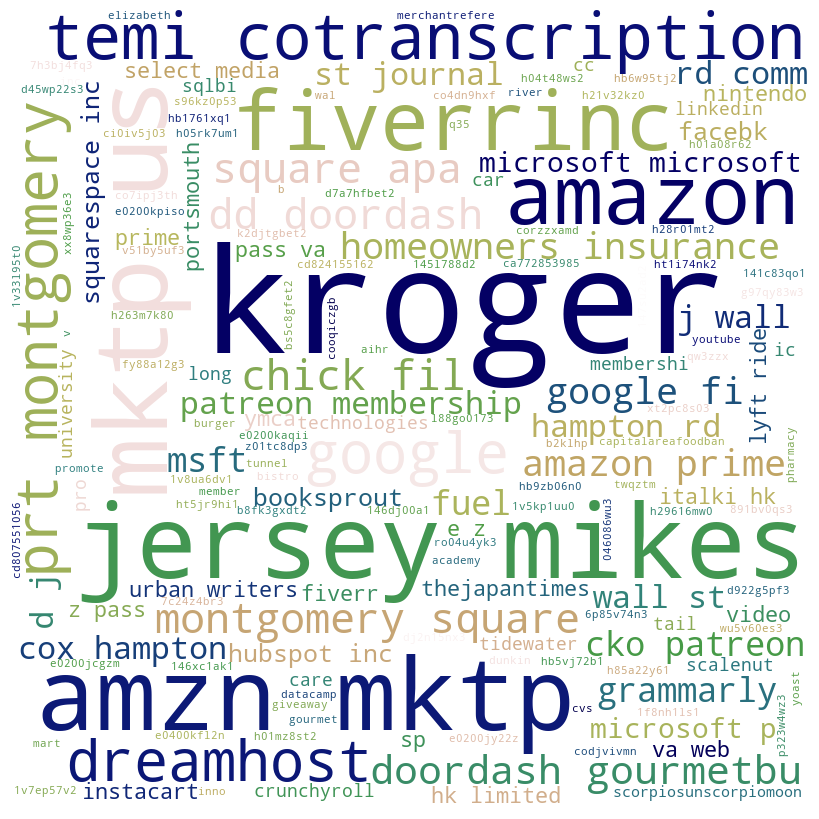

In [44]:
# Wordcloud for businesses where credit card was used

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.Description:
    
    # typecaste each val to string
    val = str(val)
    
    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                       background_color = "white",
                       colormap = "gist_earth",
                       stopwords = stopwords,
                       min_font_size = 10).generate(comment_words)

# plot the WordCloud image

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()